### Set dependancies

In [101]:
%reset -f

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Lambda
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

tf.keras.backend.clear_session()

import numpy as np
from numpy.random import randint

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import matplotlib.pyplot as plt

import pandas

import os

print(tf.__version__)

2.2.0


### Read npz

In [102]:
with np.load('vetdata.npz') as data:
    train_images = np.array(data['x_train'])
    train_labels = np.int_(data['y_train'])
    test_images = np.array(data['x_test'])
    test_labels = np.int_(data['y_test'])

test_labels.astype(int)
train_labels.astype(int)

lst = data.files
for item in lst:
    print(item)

x_train
x_test
y_train
y_test


In [103]:
class_names = ['Unknown', 'Mycoses', 'Parasites', 'Allergies', 'Autoimmune', 'Tumors', 'Hormonal', 'Viral', 'Bacterial']

### Check data

In [105]:
train_images.shape

len(train_labels)

1006

In [107]:
test_images.shape

len(test_labels)

1006

In [108]:
values = randint(0, len(train_labels)-1, 25)
values

array([586, 953, 722, 275, 299, 960, 791, 192, 821, 733, 987,  56, 873,
       885, 952, 258,  65,  53, 130, 434,  91, 978, 687, 544, 161])

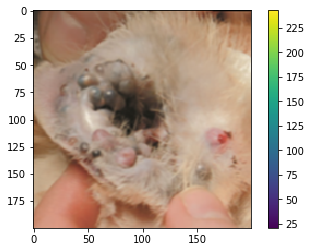

In [109]:
plt.figure()
plt.imshow(train_images[values[0]])
plt.colorbar()
plt.grid(False)
plt.show()

In [110]:
train_images = train_images / 255.0

test_images = test_images / 255.0

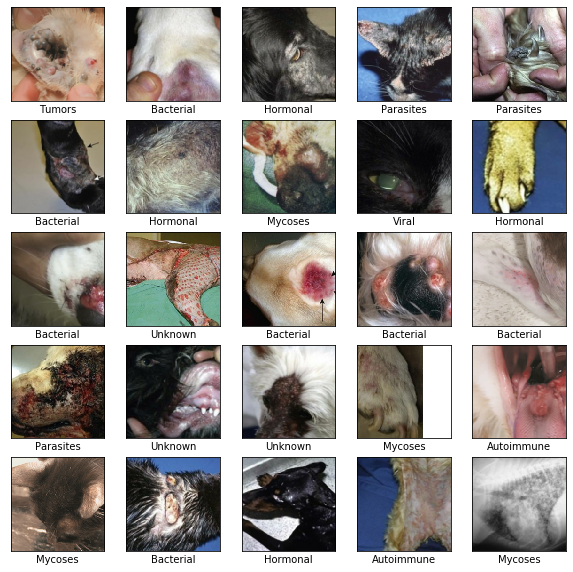

In [111]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[values[i]], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[values[i]]])
plt.show()

### Set up model

In [112]:
model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(200, 200 ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(9)
])

### Compile the model

In [113]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [114]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 25, 25, 64)        0

### Train the model

In [115]:
training_history=model.fit(train_images, train_labels, epochs=14)

Epoch 1/14
32/32 [==============================] - 27s 852ms/step - loss: 2.8272 - accuracy: 0.1750
Epoch 2/14
32/32 [==============================] - 27s 848ms/step - loss: 2.0811 - accuracy: 0.1928
Epoch 3/14
32/32 [==============================] - 27s 836ms/step - loss: 2.0411 - accuracy: 0.2207
Epoch 4/14
32/32 [==============================] - 26s 824ms/step - loss: 1.8986 - accuracy: 0.2922
Epoch 5/14
32/32 [==============================] - 26s 825ms/step - loss: 1.5667 - accuracy: 0.4622
Epoch 6/14
32/32 [==============================] - 27s 836ms/step - loss: 1.1052 - accuracy: 0.6292
Epoch 7/14
32/32 [==============================] - 26s 824ms/step - loss: 0.7791 - accuracy: 0.7505
Epoch 8/14
32/32 [==============================] - 26s 821ms/step - loss: 0.5676 - accuracy: 0.8241
Epoch 9/14
32/32 [==============================] - 26s 822ms/step - loss: 0.5138 - accuracy: 0.8489
Epoch 10/14
32/32 [==============================] - 27s 839ms/step - loss: 0.4178 - accura

### Evaluate accuracy

In [116]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 6s - loss: 0.1220 - accuracy: 0.9811

Test accuracy: 0.9811133146286011


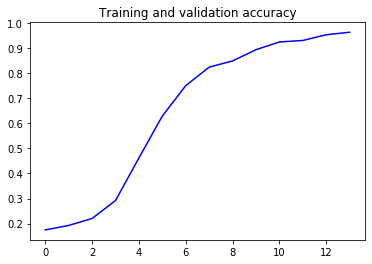

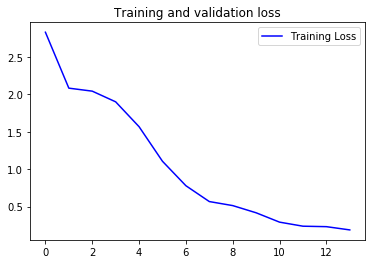

In [117]:
acc = training_history.history['accuracy']
loss = training_history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Make predictions
Attach a softmax layer to convert the logits to probabilities, which are easier to interpret. 

In [118]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [119]:
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 9)                 20508713  
_________________________________________________________________
softmax (Softmax)            (None, 9)                 0         
Total params: 20,508,713
Trainable params: 20,508,713
Non-trainable params: 0
_________________________________________________________________


In [120]:
predictions = probability_model.predict(test_images)

In [122]:
predictions[600]

array([0.000, 0.000, 0.000, 0.000, 0.000, 0.997, 0.000, 0.000, 0.003],
      dtype=float32)

In [ ]:
values=randint(0, len(test_labels)-1,100)
predictions[values]

In [131]:
np.argmax(predictions[252])

2

In [132]:
test_labels[252]

2

In [127]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array, true_label[i]
    plt.grid(False)
    plt.xticks(range(9))
    plt.yticks([])
    thisplot = plt.bar(range(9), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

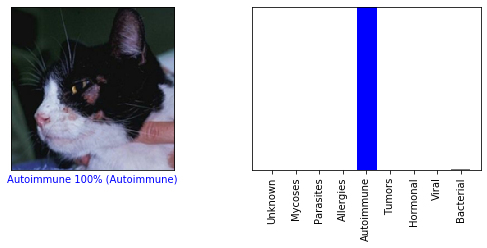

,Class,Prediction
0,Unknown,0.000
1,Mycoses,0.000
2,Parasites,0.000
3,Allergies,0.000
4,Autoimmune,0.997
5,Tumors,0.000
6,Hormonal,0.000
7,Viral,0.000
8,Bacterial,0.003


In [128]:
i = randint(0, len(test_labels)-1)
plt.figure(figsize=(9,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
_ = plt.xticks(range(9), class_names, rotation=90)
plt.show()

import pandas
d = {'Class': class_names, 'Prediction': predictions[i]}
pandas.DataFrame(data=d).round(3)

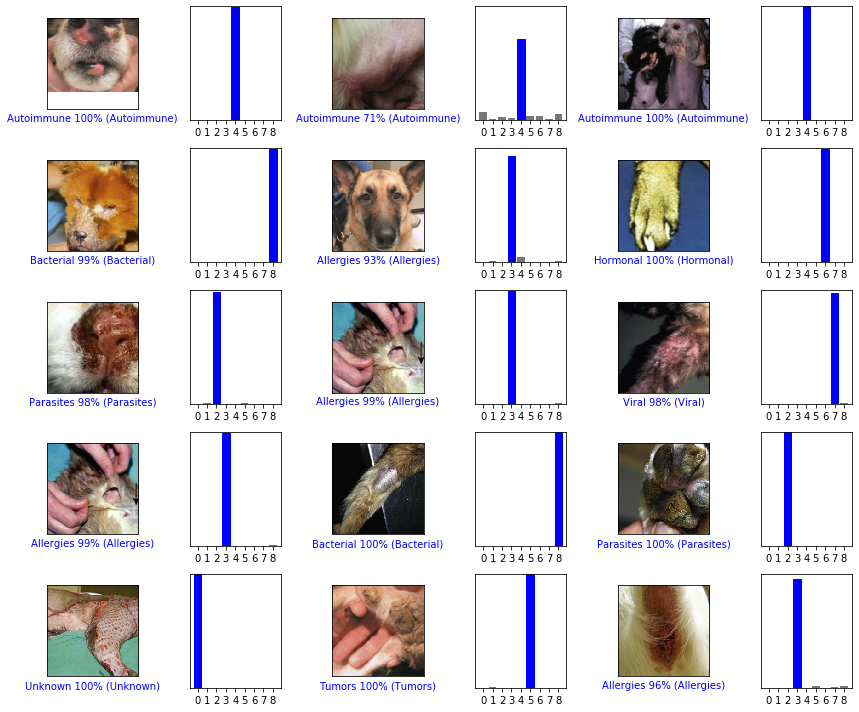

In [129]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
values=randint(0, len(test_labels)-1,num_images)
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(values[i], predictions[values[i]], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(values[i], predictions[values[i]], test_labels)
plt.tight_layout()
plt.show()

In [130]:
import os
import cv2
import glob

IMG_HEIGHT=200
IMG_WIDTH=200

def im2npa(imagedir, subdirs, show):
# create numpy array from directory of images
# inputs:
# imagedir - directory with the images
# subdirs - list of subdirs (classes)
# show - if=1, plot files and file names
# outputs:
# data - numpy array variable with all images as tensor
    data = []
    for i in range(len(subdirs)):
        pathis=os.path.join(imagedir, subdirs[i],"*.*")
        files = glob.glob(pathis)
        for myFile in files:
            image = cv2.imread (myFile, cv2.IMREAD_UNCHANGED)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (IMG_HEIGHT,IMG_WIDTH))
            data.append (image)
            if show==1:
                print(myFile)
                imgplot = plt.imshow(image)
                plt.show()
    
    data=np.asarray(data)
    print('Data shape:', data.shape)
    return data

In [131]:
x_valid=im2npa('./data/random/', ['z'],0)

Data shape: (0,)


In [132]:
valid_labels=np.zeros((len(x_valid),), dtype=int)

In [133]:
predictions = probability_model.predict(x_valid)

UnboundLocalError: local variable 'batch_outputs' referenced before assignment